# Demand patterns and seasonality

Seasonal demand is a certain time series with repetitive or predictable patterns of demand, due to re-occurring seasonal events. These patterns can re-occur over days, weeks, months ... and can make it harder for businesses to forecast future demand trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [2]:
phil = pd.read_csv("cleaned_Phil.csv")
phil.count()

/Users/daiwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id                1678842
duration               1678842
start_time             1678842
end_time               1678842
start_station          1678842
end_station            1678842
bike_id                1678842
plan_duration          1678842
trip_route_category    1678842
passholder_type        1678842
bike_type              1678842
Date_s                 1678842
Weekday_s              1678842
Hour_s                 1678842
Date_e                 1678842
Weekday_e              1678842
Hour_e                 1678842
start_coordinates      1678842
end_coordinates        1678842
dtype: int64

In [3]:
phil.sort_values(["trip_id","Date_s"], inplace=True)
phil.set_index(pd.DatetimeIndex(phil["Date_s"]),inplace=True)
phil.drop("Date_s", axis=1, inplace=True)

In [4]:
phil.head()

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates
Date_s,,,,,,,,,,,,,,,,,,
2021-01-01,365184627,6,2021-01-01 00:52:00,2021-01-01 00:58:00,3039,3051,18838,30,One Way,Indego30,electric,4,0,2021-01-01,4,0,"39.97121,-75.159698","39.967442,-75.175072"
2021-01-01,365184628,6,2021-01-01 00:50:00,2021-01-01 00:56:00,3125,3028,2712,30,One Way,Indego30,standard,4,0,2021-01-01,4,0,"39.943909,-75.167351","39.940609,-75.149582"
2021-01-01,365184629,6,2021-01-01 00:49:00,2021-01-01 00:55:00,3125,3028,16576,30,One Way,Indego30,electric,4,0,2021-01-01,4,0,"39.943909,-75.167351","39.940609,-75.149582"
2021-01-01,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,3330,30,One Way,Indego30,standard,4,0,2021-01-01,4,0,"39.947319,-75.156952","39.962891,-75.166061"
2021-01-01,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,14683,30,One Way,Indego30,standard,4,0,2021-01-01,4,0,"39.947922,-75.162369","39.933151,-75.162483"


In [6]:
# Let's explore fleet size

fleet_size = len(phil["trip_id"].unique())

print("The fleet consists of {} trips (for the observed time frame)".format(fleet_size))

The fleet consists of 1678842 trips (for the observed time frame)


## Availability over time: month,days and hours

Now we are going to explore fleet availability in the week and day by checking how many unique bikes are available for each day and hour of day.

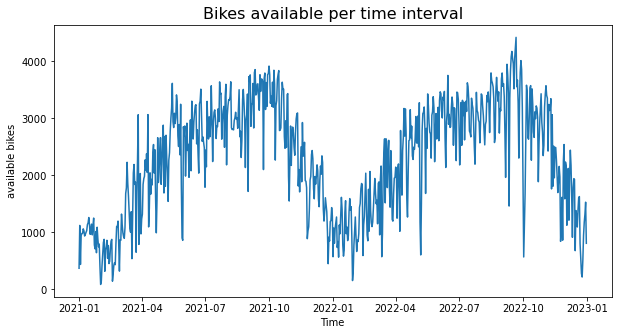

In [7]:
# Availability over months 

phil_Date_avail = phil.groupby("Date_s")["trip_id"].nunique() # this counts unique vehicles per 7-min time interval

fig,ax = plt.subplots(figsize=(10,5)) 

ax.plot(phil_Date_avail)
ax.set_title("Bikes available per time interval",fontsize=16)
ax.set_xlabel("Time")
ax.set_ylabel("available bikes")

fig.savefig("availableBikes.pdf")
plt.show()

In [8]:
# Availability by day of week (0 = Monday, 6 = Sunday)

phil_weekday_avail = phil.groupby(["Date_s","Weekday_s"])["trip_id"].nunique()
phil_weekday_avail = pd.DataFrame(phil_weekday_avail)

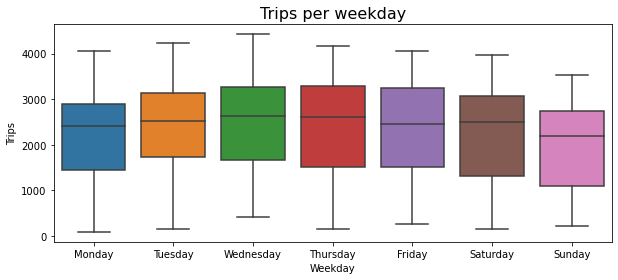

In [12]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=phil_weekday_avail.index.get_level_values(1), y=phil_weekday_avail["trip_id"],ax=ax)

ax.set_title("Trips per weekday",fontsize=16)
ax.set_xlabel("Weekday")
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel("Trips")

fig.savefig("TripsByWeekday.pdf")
plt.show()

In [14]:
# Availability by time of day 

phil_time_avail = phil.groupby(["Date_s","Hour_s"])["trip_id"].nunique()
phil_time_avail = pd.DataFrame(phil_time_avail)


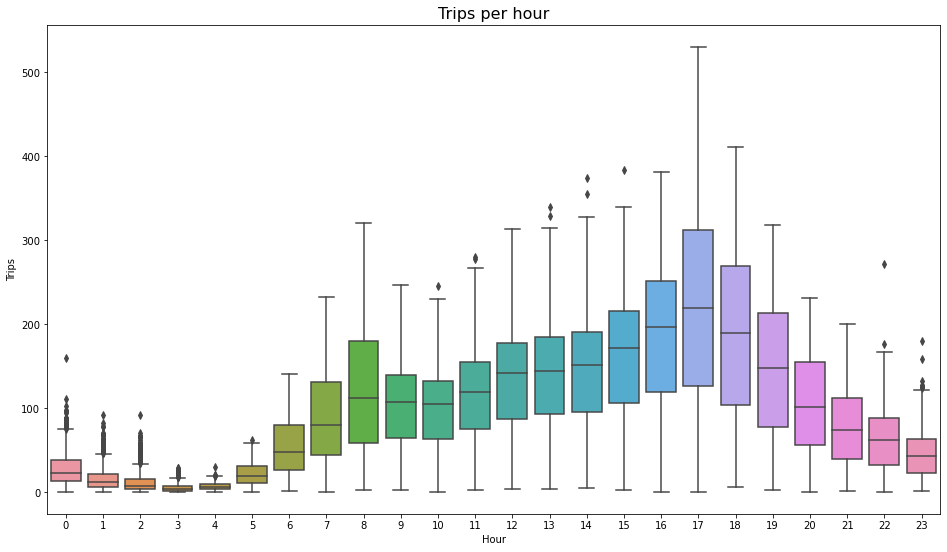

In [16]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=phil_time_avail.index.get_level_values(1), y=phil_time_avail["trip_id"],ax=ax)

ax.set_title("Trips per hour",fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("Trips")

fig.savefig("TripsByHour.pdf")
plt.show()